In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
import json
from sodapy import Socrata
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from country_list import countries_for_language
import unidecode

plt.style.use('ggplot')
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')

In [4]:
df = pd.read_csv("../../../data/deaths.csv")

In [13]:
df = df[df["Year"] == 2017]
df_w = df[df["Entity"]=="World"]

In [17]:
df_w

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),...,Neonatal disorders (deaths),Alcohol use disorders (deaths),Natural disasters (deaths),Diarrheal diseases (deaths),Heat (hot and cold exposure) (deaths),Nutritional deficiencies (deaths),Suicide (deaths),Conflict (deaths),Diabetes (deaths),Poisonings (deaths)
6573,World,OWID_WRL,2017,NaN,288021.105387,2.558606e+06,NaN,231770.992044,26445.0,1.779095e+07,...,1.783770e+06,184934.24176,9602.935057,1.569556e+06,53349.51878,269996.917689,793823.469135,129720.145674,1.369849e+06,72370.53192


In [107]:
df_cuenta = df_w.T.reset_index()[4:].rename(columns={"index":"enfermedad", 6573:"cuenta"})
df_cuenta["enfermedad"] = df_cuenta["enfermedad"].apply(lambda x: x.replace("(deaths)", ""))
df_cuenta = df_cuenta.reset_index(drop=True)
df_cuenta["cuenta"] = df_cuenta["cuenta"].fillna(0)
df_cuenta["cuenta"] = df_cuenta["cuenta"].astype(int) / 1000000
covid = pd.DataFrame({"enfermedad":["covid-19"], "cuenta": 0.4})
df_cuenta = df_cuenta.append(covid)
df_cuenta = df_cuenta.sort_values("cuenta", ascending=False).reset_index(drop=True)
df_cuenta["enfermedad"] = df_cuenta["enfermedad"].apply(lambda x: x.strip())
ls = ["Cardiovascular diseases", "Respiratory diseases", "Diabetes", "Cancers", "Kidney disease", "Suicide", "Dementia","Liver diseases"]
df_cuenta["color"] = df_cuenta["enfermedad"].apply(lambda x: "red" if x in ls else "#1c1c3c")
df_cuenta.loc[df_cuenta["enfermedad"]=="covid-19", "color"] = "green"
df_cuenta

,enfermedad,cuenta,color
0,Cardiovascular diseases,17.790948,red
1,Cancers,9.556244,red
2,Respiratory diseases,3.914196,red
3,Lower respiratory infections,2.558606,#1c1c3c
4,Dementia,2.514618,red
5,Digestive diseases,2.377684,#1c1c3c
6,Neonatal disorders,1.783769,#1c1c3c
7,Diarrheal diseases,1.569555,#1c1c3c
8,Diabetes,1.369848,red
9,Liver diseases,1.322867,red


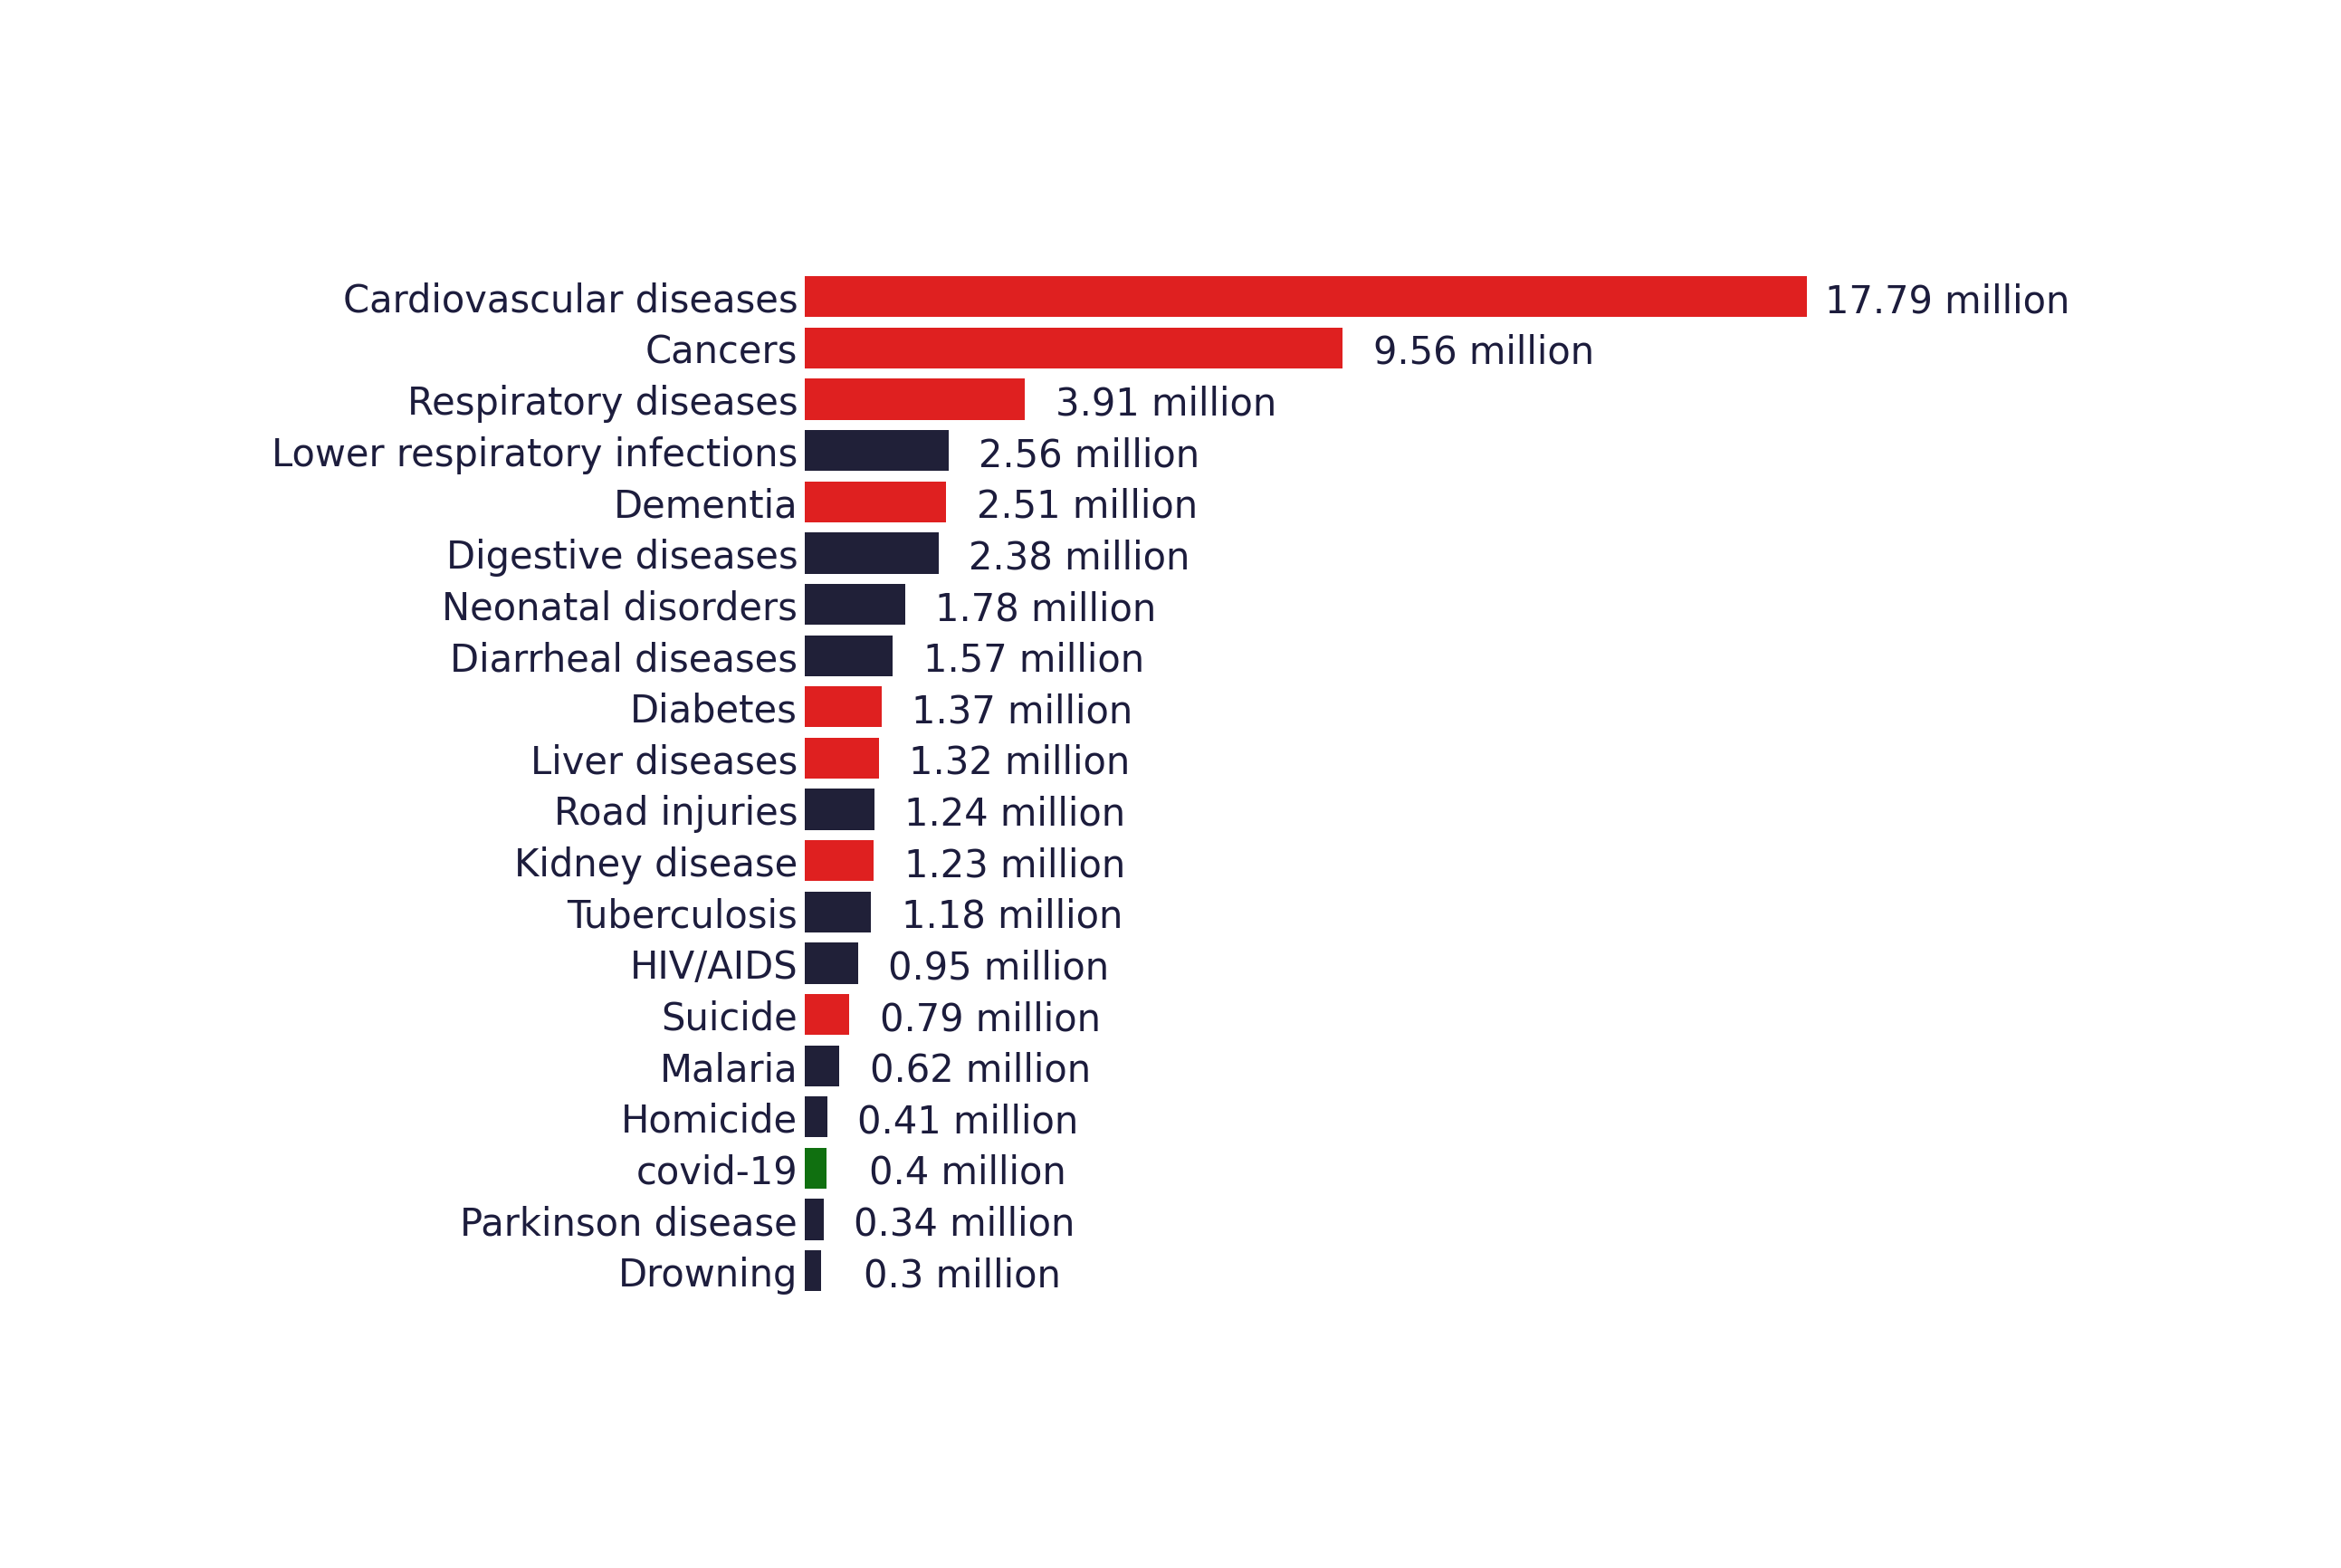

In [108]:
plt.figure
ax = sns.barplot(x="cuenta", y="enfermedad", data=df_cuenta.head(20), orient="h",palette=df_cuenta["color"])

plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 2.5

ax.tick_params(axis='both', which='major', labelsize=20)
for index, row in df_cuenta.head(20).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            str(round(row["cuenta"],2)) + " million", # texto
            color='#1c1c3c', 
            ha="center", 
            size=20)
plt.savefig(f'muertes.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()